In [3]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [4]:

df = pd.read_csv('C:\\Users\\hp\\Downloads\\creditcardfraud\\creditcard.csv',low_memory=False)
df=df.sample(frac=1).reset_index(drop=True)
df.head()
print(len(df))
df.head(5)

284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,165576.0,2.063057,-0.333399,-0.738544,0.095454,-0.231086,-0.175587,-0.524818,0.025746,1.497511,...,-0.189457,-0.425022,0.239009,-1.140971,-0.265121,-0.853714,0.056825,-0.039556,1.00,0
1,42010.0,1.101072,0.099279,0.507688,1.495400,-0.394915,-0.384315,0.055510,-0.002878,0.373768,...,-0.075846,-0.064223,-0.031957,0.389901,0.587655,-0.332264,0.031848,0.021303,29.09,0
2,58889.0,-2.464232,-0.626193,2.400165,0.664460,0.247321,-1.231264,-0.380931,0.277355,-0.109078,...,0.220193,0.324511,-0.501912,0.748473,0.243815,-0.517373,-0.234845,-0.387818,45.00,0
3,162112.0,1.761586,-0.269314,-1.462641,1.725962,0.271386,0.073185,-0.001993,-0.085478,1.029714,...,0.236491,0.920613,-0.243447,0.457338,0.524506,-0.278253,0.040037,0.002973,120.98,0
4,119223.0,2.067612,0.186982,-1.652488,0.438475,0.397454,-0.931461,0.212815,-0.263964,0.431681,...,-0.353523,-0.895925,0.347972,0.648645,-0.259597,0.164020,-0.060219,-0.028586,1.98,0


In [5]:
fraud=df.loc[df['Class']==1]
non_fraud=df.loc[df['Class']==0] 

print(len(fraud))
print(len(non_fraud))

492
284315


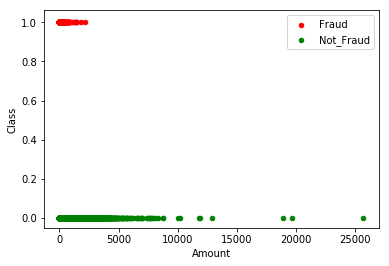

In [6]:
ax=fraud.plot.scatter(x='Amount',y='Class',color='red',label='Fraud')
non_fraud.plot.scatter(x='Amount',y='Class',color='green',label='Not_Fraud',ax=ax)
plt.show()


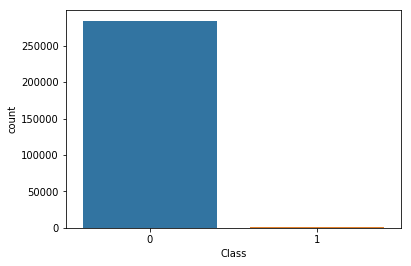

In [29]:
import seaborn as sns
sns.countplot(x="Class", data=df)

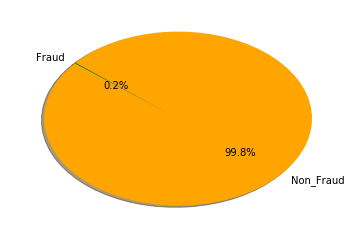

In [16]:
labels=['Fraud','Non_Fraud']
sizes=[492,284315]
colors=['green','orange']
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [17]:
#Machine Learning Part
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
x=df.iloc[:,:-1]#accept the class column
y=df['Class']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.35)


In [31]:
model=LogisticRegression(C=1e5,penalty='l2',solver='saga',multi_class='multinomial')
                         #10000 #C parameter disincentifies and regulates overfitting

model.fit(X_train,Y_train)
print("Score:",model.score(X_test,Y_test))

Score: 0.99818424405365


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
